**Define the necessary libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Load the dataset into the dataframe**

In [43]:
df=pd.read_csv("BigmartSales.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Drop the "Item_Identifier" and "Outlet_Identifier" columns**

In [45]:
dropcl=["Item_Identifier", "Outlet_Identifier"]
df = df.drop(columns=dropcl)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


**Extract the target labels**

In [46]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Replace the field "Item_Fat_Content" with numerical value**

In [49]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':'0','Regular':'1'})

In [50]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


**Perform ordinal encoding of the "Item_Type", "Outlet_Type", "Outlet_Location_Type" and "Outlet_Size" field**

In [55]:
# List of columns to be encoded
columns_to_encode = ["Item_Type", "Outlet_Type", "Outlet_Location_Type", "Outlet_Size"]

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

# Display the updated DataFrame
print(df.head())

   Item_Weight Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                0         0.016047        4.0  249.8092   
1         5.92                1         0.019278       14.0   48.2692   
2        17.50                0         0.016760       10.0  141.6180   
3        19.20                1         0.000000        6.0  182.0950   
4         8.93                0         0.000000        9.0   53.8614   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999          1.0                   0.0          1.0   
1                       2009          1.0                   2.0          2.0   
2                       1999          1.0                   0.0          1.0   
3                       1998          1.0                   2.0          0.0   
4                       1987          0.0                   2.0          1.0   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          

**Imputation of "Outlet_Size" field with mode value**

In [52]:
# Impute missing values in the "Outlet_Size" column with the mode
mode_value = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_value, inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.92,1,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.50,0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.20,1,0.000000,6.0,182.0950,1998,1.0,2.0,0.0,732.3800
4,8.93,0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052


**Check for null values**

In [54]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()
print(null_values)

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


**Imputation of "Item_Weight" field with mode value**

In [56]:
# Impute missing values in the "Outlet_Size" column with the mode
mode_value_item_weight = df['Item_Weight'].mode()[0]
df['Item_Weight'].fillna(mode_value, inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.92,1,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.50,0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.20,1,0.000000,6.0,182.0950,1998,1.0,2.0,0.0,732.3800
4,8.93,0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052


**Display all field in the dataset using boxplot**

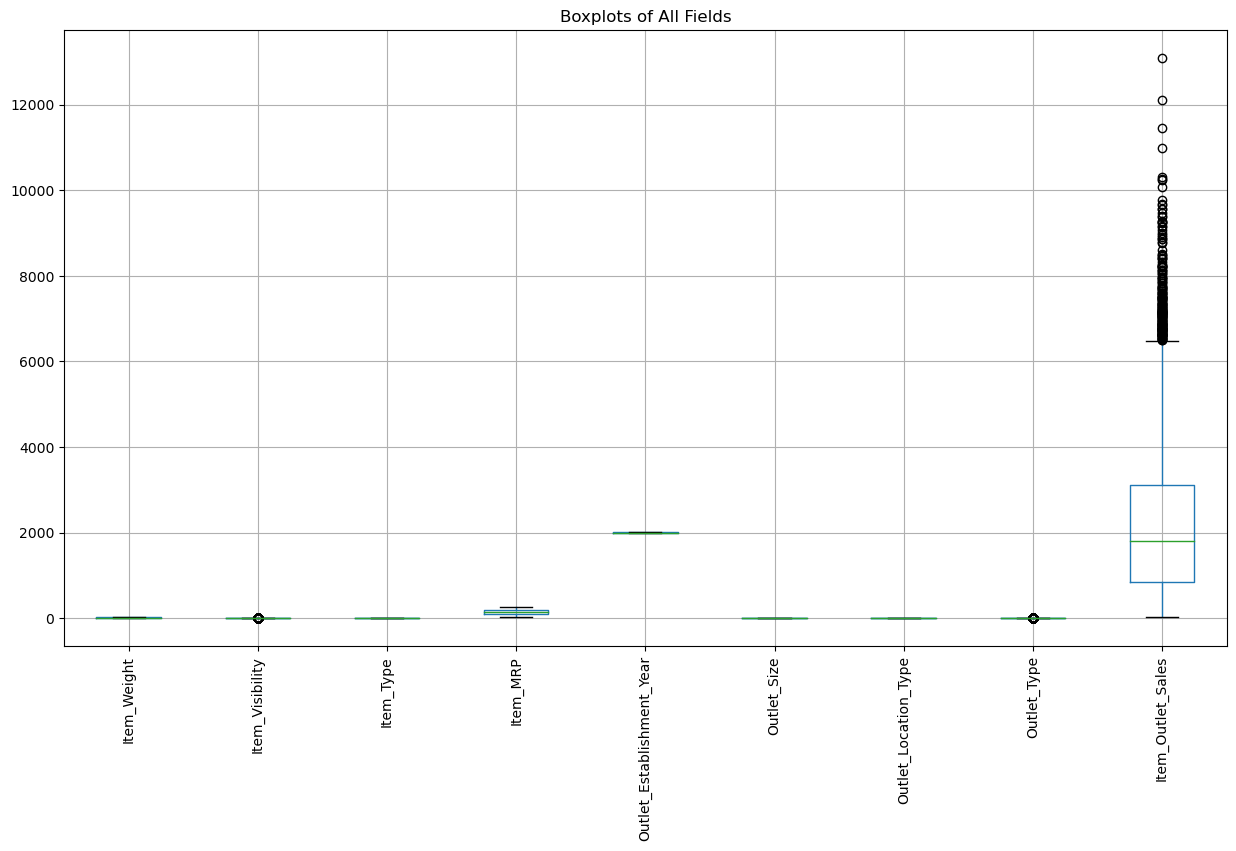

In [57]:
df.boxplot(rot=90, figsize=(15, 8))
plt.title('Boxplots of All Fields')
plt.show()

**Split the dataset into train and test(20%), apply Linear Regression and calculate RMSE value**

In [63]:
# Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']  # Target variable

# Select only numeric features for X
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('Item_Outlet_Sales', axis=1)  # Exclude the target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Linear Regression: {rmse}')

Root Mean Squared Error (RMSE) with Linear Regression: 1131.2338727977424


**Apply StandardScaller and split the dataset into train and test(20%)**

In [64]:
# Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']  # Target variable

# Select only numeric features for X
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('Item_Outlet_Sales', axis=1)  # Exclude the target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler only to numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with StandardScaler: {rmse}')

Root Mean Squared Error (RMSE) with StandardScaler: 1131.2338727977424


**Apply Linear Regression and calculate RMSE value**

In [65]:
# Apply Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Linear Regression: {rmse}')

Root Mean Squared Error (RMSE) with Linear Regression: 1131.2338727977424


**Apply MinMaxScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [67]:
# Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']  # Target variable

# Select only numeric features for X
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('Item_Outlet_Sales', axis=1)  # Exclude the target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MimMaxScaler only to numeric features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with MinMaxScaler: {rmse}')

Root Mean Squared Error (RMSE) with MinMaxScaler: 1131.2338727977424


**Apply RobustScaler,Split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [68]:
# Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']  # Target variable

# Select only numeric features for X
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('Item_Outlet_Sales', axis=1)  # Exclude the target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RobustScaler only to numeric features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with RobustScaler: {rmse}')

Root Mean Squared Error (RMSE) with RobustScaler: 1131.2338727977424


**Apply MaxAbsScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [69]:
# Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']  # Target variable

# Select only numeric features for X
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('Item_Outlet_Sales', axis=1)  # Exclude the target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MaxAbsScaler only to numeric features
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with MaxAbsScaler: {rmse}')


Root Mean Squared Error (RMSE) with MaxAbsScaler: 1131.2338727977424


**Apply Normalizer, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [71]:
# Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']  # Target variable

# Select only numeric features for X
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('Item_Outlet_Sales', axis=1)  # Exclude the target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Normalizer only to numeric features
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Normalizer: {rmse}')

Root Mean Squared Error (RMSE) with Normalizer: 1131.6916988823384


**Define a function valuelabel to place the legend of each bar in the histogram**

In [80]:
def valuelabel(ax, rects, offset=0.05, format='{:.2f}', fontsize=10):
  
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + offset,
                format.format(height),
                ha='center', va='bottom', fontsize=fontsize)

**Plot a histogram to display the RMSE value of each scaler**

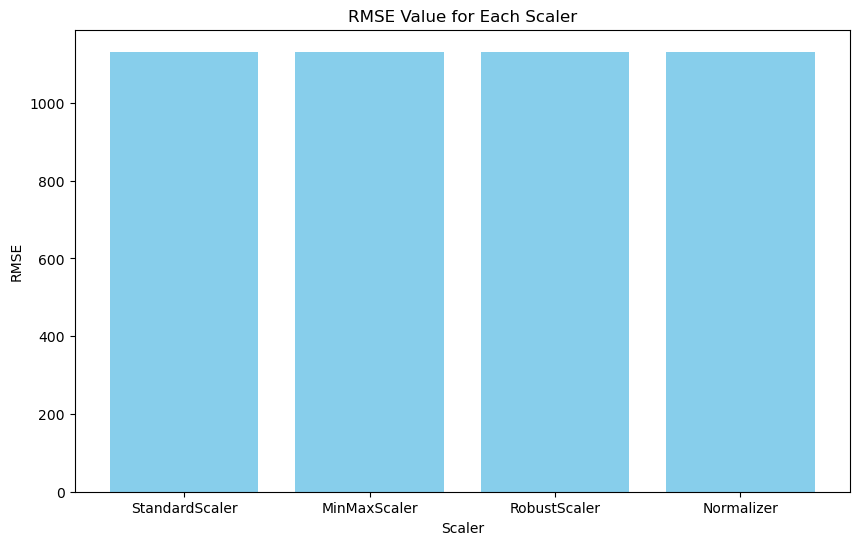

In [82]:
# Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']  # Target variable

# Select only numeric features for X
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('Item_Outlet_Sales', axis=1)  # Exclude the target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of scalers
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

# Dictionary to store RMSE values for each scaler
rmse_values = {}

# Apply each scaler, train a linear regression model, and calculate RMSE
for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values[type(scaler).__name__] = rmse

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color='skyblue')
plt.xlabel('Scaler')
plt.ylabel('RMSE')
plt.title('RMSE Value for Each Scaler')
plt.show()